In [1]:
import numpy as np
import matplotlib
from matplotlib import pyplot as plt
import xarray as xr
# %config InlineBackend.figure_format='retina'


In [2]:
def detrend_dim(da, dim, deg=1):
    p = da.polyfit(dim=dim, deg=deg)
    fit = xr.polyval(da[dim], p.polyfit_coefficients)
    return da - fit


# Load data

In [3]:
window = 3

t2m_era5 = xr.open_mfdataset(f'/data0/samuelb/como2024/como/ERA5_resampled/t2m_balkans_{window}daymean_startjan1.nc').var167
sm_era5 = xr.open_mfdataset(f'/data0/samuelb/como2024/como/ERA5_resampled/sm_balkans_{window}daymean_startjan1.nc').var39


# Detrend data

In [4]:
da = t2m_era5

alldays = []
for dayofyear in np.unique(da.time.dt.dayofyear):
    alldays.append(detrend_dim(da.where(da.time.dt.dayofyear==dayofyear,drop=True),'time'))
da_detrended = xr.concat(alldays,'time').sortby('time')


/home/samuelb/.conda/envs/como2024/lib/python3.9/site-packages/xarray/core/indexing.py:1621: PerformanceWarning: Slicing with an out-of-order index is generating 43 times more chunks
  return self.array[key]


# Plot to confirm

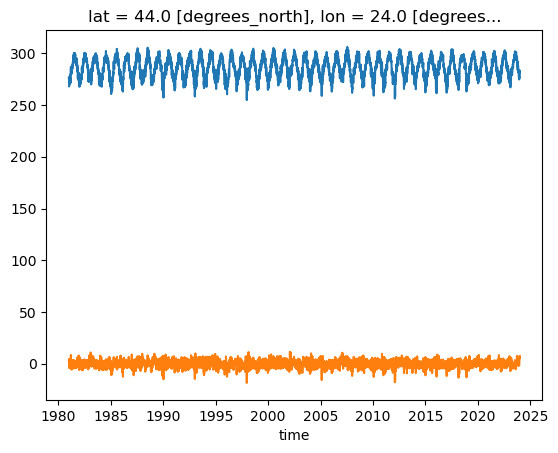

In [5]:
t2m_era5.sel(lat=44,lon=24).plot()
da_detrended.sel(lat=44,lon=24).plot()


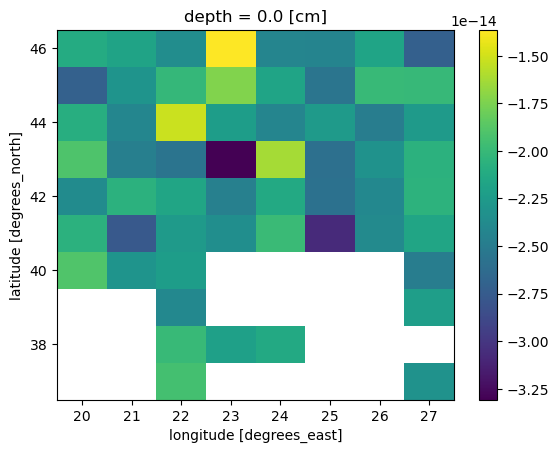

In [6]:
# Should be zero

da_detrended.mean('time').plot()


# Load / detrend / save data in same loop

In [10]:
windows = [
    3,
    5,
    7,
]
varnames = [
    # 't2m',
    # 'sm',
    'Z500',
]
varcodes = [
    # 'var167',
    # 'var39',
    'var129',
]
regions = [
    # 'balkans',
    # 'balkans',
    'global',
]

for varname,varcode,region in zip(varnames,varcodes,regions):
    print(f'{varname} START')
    for window in windows:
        print(f'–––– {window}-day START')
        da = xr.open_mfdataset(f'/data0/samuelb/como2024/ERA5_resampled/{varname}_{region}_{window}daymean_startjan1.nc')[varcode]
        alldays = []
        for dayofyear in np.unique(da.time.dt.dayofyear):
            alldays.append(detrend_dim(da.where(da.time.dt.dayofyear==dayofyear,drop=True),'time'))
        da_detrended = xr.concat(alldays,'time').sortby('time')
        da_detrended.to_netcdf(f'/data0/samuelb/como2024/ERA5_resampled/detrended/{varname}_{region}_{window}daymean_startjan1.nc')


Z500 START
–––– 3-day START


/home/samuelb/.conda/envs/como2024/lib/python3.9/site-packages/xarray/core/indexing.py:1621: PerformanceWarning: Slicing with an out-of-order index is generating 43 times more chunks
  return self.array[key]


–––– 5-day START


/home/samuelb/.conda/envs/como2024/lib/python3.9/site-packages/xarray/core/indexing.py:1621: PerformanceWarning: Slicing with an out-of-order index is generating 43 times more chunks
  return self.array[key]


–––– 7-day START


/home/samuelb/.conda/envs/como2024/lib/python3.9/site-packages/xarray/core/indexing.py:1621: PerformanceWarning: Slicing with an out-of-order index is generating 43 times more chunks
  return self.array[key]
